<img src="pics/otus.png">

In [4]:
%matplotlib inline

### Опрос в началале занятия: https://docs.google.com/forms/d/e/1FAIpQLSclm8sNFhJkS-INyNOxfCYv53PNSpPHoqmuZX11hF-5zlD8TA/viewform?usp=sf_link

In [ ]:
## Вопрос
Для чего нужна визуализация данных?

# Визуализация данных и карьерные пути

### Data analyst

Должен уметь быстро находить закономерности в данных и демонстрировать результаты бизнесу.

toolbox: быстрые и понятные визуализации, которые позволяют на коленке сделать презентацию. + красивые визуализации, в которые конечный пользователь захочет залипнуть

### ML-инженер

Должен уметь выбрать лучшую модель для данной задачи (exploration), следить за техническими показателями системы (нагрузка, производительность и т.д.).

toolbox: максимально компактный и эффективный, то что позволяет вам максимально быстро реализовать продакшен-решение.

### ML-researcher

Умеет быстро воспринимать различные визуализации. Понимает спектр способов для визуализации, 
чтобы при необходимости применить их в статье.

toolbox: широкий знания о разных видах визуализации, умение хорошо применять несколько для исследований.

### Data scientist (как много в этом слове)

Часто это тоже самое, что Data analyst или ML-инженер, зависит от размера и профиля компании.

### Data journalist

95% процентов успеха -- это умение визуализировать данные. 

toolbox: чем больше, тем лучше. Умение создавать собственные инструменты визуализации (D3.js), хорошие навыки дизайна.


# Визуализация данных


* исследование закономерностей данных (существует ли в данных закономерность?)
* подготовка моделей (шумы, признаки, гипотезы)
* результаты работы моделей (мониторинги, количественные графики и т.д.)

### Что можно визуализировать?

* количественные характеристики
* изменение количественных характеристик во времени
* изменение количественных характеристик в пространстве
* распределения характеристик
* etc

Джон Сноу спас Лондон от халеры с помощью визуализации данных

<img src="john-snow.jpg">

Флоренс Натингейл и диаграмма "петушиный гребень" (coxcomb diagram)

<img src="Coxcombs.jpg">

Современные способы визуализации кажутся нам очевидными, но они были такими не всегда.
https://www.bbc.com/russian/society/2015/07/150729_vert_cul_london_underground_map_design

<img src="metro.jpg">

## Anscombe’s quartet

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
anscombe = sns.load_dataset("anscombe")
anscombe.groupby("dataset").describe()

Рисуем линейную регрессию и 95% confidence interval.

In [5]:
for data_set in anscombe.dataset.unique():
    df = anscombe.query("dataset == '{}'".format(data_set))
    slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=df.x, y=df.y)
    sns.lmplot(x="x", y="y", data=df);
    plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))

NameError: name 'anscombe' is not defined

# Виды графиков
- plot (график)
- bar-chart (столбчатая диаграмма)
- pie-chart (круговая диаграмма) // заметка на полях, при большом количестве категорий работает плохо
- radar (лепестковая диаграмма) 
- scatter-plot (диаграмма рассеяния)
- heat-map (тепловая диаграмма)

### Plot

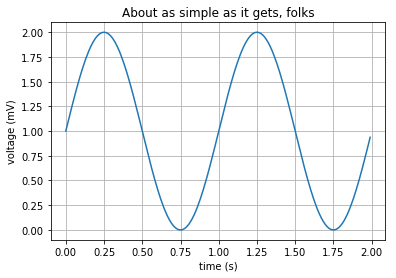

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

### Bar chart

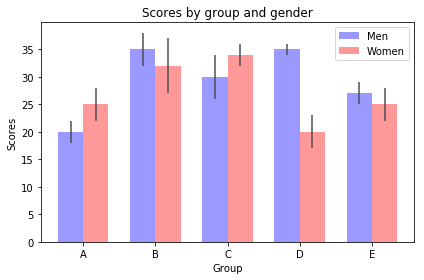

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

### Pie chart

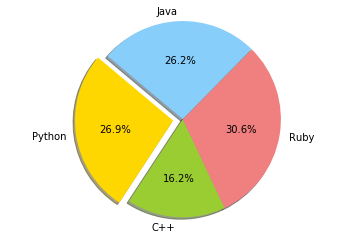

In [14]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### Radar

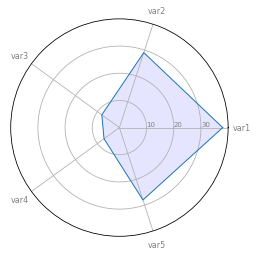

In [16]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

### Scatter plot

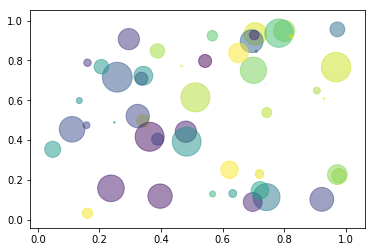

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Heatmap

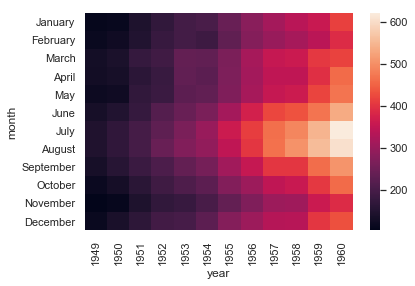

In [19]:
import seaborn as sns; sns.set()

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

### Отличное использование heatmap 

В статье с недавно завершившегося ACL-2018 https://arxiv.org/pdf/1805.08154.pdf

### BoxPlot

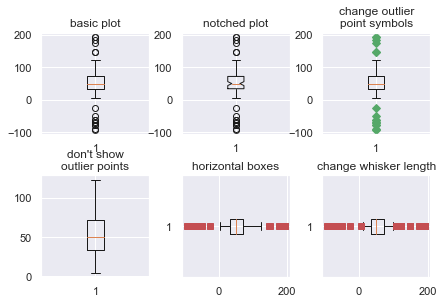

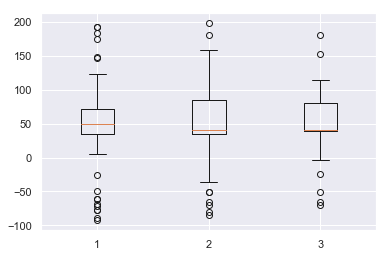

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

# Инструментарий
- matplotlib https://matplotlib.org
- pandas https://pandas.pydata.org
- seaborn https://seaborn.pydata.org
- plotly https://plot.ly
- bokeh https://bokeh.pydata.org/en/latest/
- folium https://python-visualization.github.io/folium/
- d3.js https://d3js.org


# Таблицы тоже бывают разные

https://bureau.ru/soviet/selected/dima-shishkin/birman-pilit-tablitsy/

# Визуализация данных на Python

In [22]:
import numpy as np
import pandas as pd

In [23]:
!cat populations.txt

year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [24]:
data = pd.read_csv('populations.txt', sep='\t')
data.head()

year     hare     lynx  carrot
0  1900  30000.0   4000.0   48300
1  1901  47200.0   6100.0   48200
2  1902  70200.0   9800.0   41500
3  1903  77400.0  35200.0   38200
4  1904  36300.0  59400.0   40600

## Библиотеки визуализации данных

## matplotlib

https://matplotlib.org/tutorials/index.html#introductory

In [25]:
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

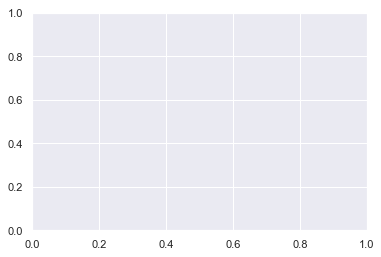

In [26]:
fig, ax1 = plt.subplots(1, 1)

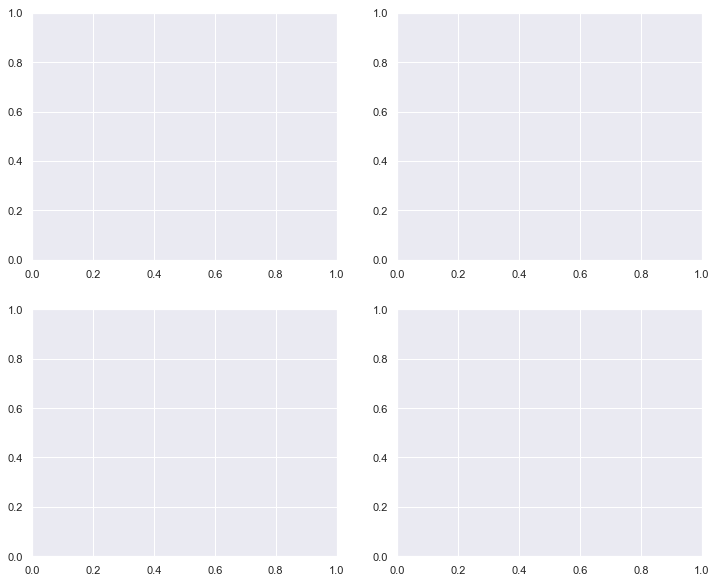

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

In [28]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
def offset_off(x):
     x.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


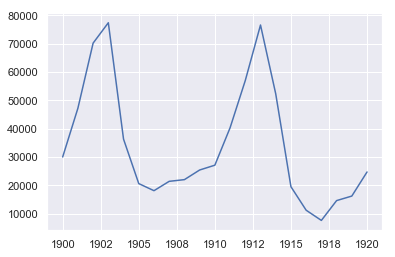

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(data['year'], data['hare'])
offset_off(ax)

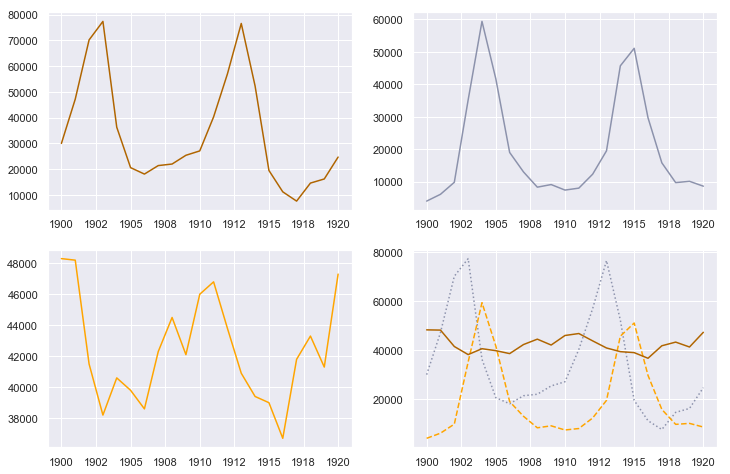

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))

ax[0][0].plot(data['year'], data['hare'], color ='#b06500')
offset_off(ax[0][0])

ax[0][1].plot(data['year'], data['lynx'], color = '#8c92ac')
offset_off(ax[0][1])

ax[1][0].plot(data['year'], data['carrot'], color = '#ffa500')
offset_off(ax[1][0])

ax[1][1].plot(data['year'], data['hare'], label = 'Hares', color='#8c92ac', ls = ':'); 
ax[1][1].plot(data['year'], data['lynx'], label = 'Lynxes', color='#ffa500', ls = '--');
ax[1][1].plot(data['year'], data['carrot'], label = 'Carrots', color='#b06500', ls = '-');
offset_off(ax[1][1])


# Упражнение
Реализовать отображение графика с четырьмя подокнами.
На первых трех необходимо отобразить по отдельности популяции зайцев, рысей, моркови, и на четвертом отобразить их всех вместе. 

Проработать внешний вид графиков - data-ink ratio, согласованность, ясность - что есть что - , целостность и тд. Например, убедиться, что про каждый график известно, к чему он относится - зайцам, рысям или моркови. А так же убедиться, что для одних и тех же объектов используются одни и те же цвета.

# Решение

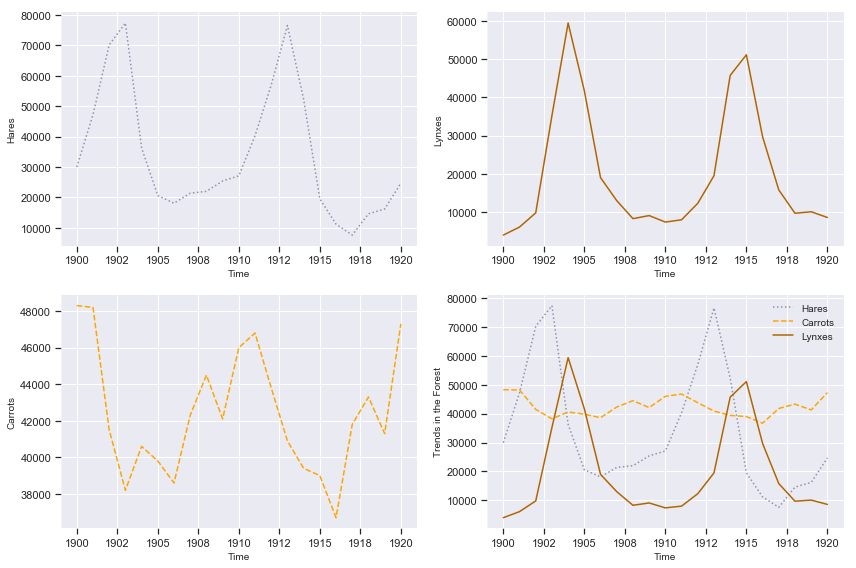

In [31]:
fig, ax1 = plt.subplots(2, 2, figsize=(12,8))

ax1[0][0].set_xlabel('Time', fontsize = 10)
ax1[0][0].set_ylabel('Hares', fontsize = 10)

ax1[0][0].plot(data['year'], data['hare'], color='#8c92ac', ls = ':'); 

ax1[0][0].spines['right'].set_visible(False)
ax1[0][0].spines['top'].set_visible(False)

ax1[0][0].yaxis.set_ticks_position('left')
ax1[0][0].xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1[0][0].spines[axis].set_linewidth(0.5)

#Lynxes
ax1[0][1].set_xlabel('Time', fontsize = 10)
ax1[0][1].set_ylabel('Lynxes', fontsize = 10)

ax1[0][1].plot(data['year'], data['lynx'], color='#b06500', ls = '-'); 

ax1[0][1].spines['right'].set_visible(False)
ax1[0][1].spines['top'].set_visible(False)

ax1[0][1].yaxis.set_ticks_position('left')
ax1[0][1].xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1[0][1].spines[axis].set_linewidth(0.5)
    
#Carrots
ax1[1][0].set_xlabel('Time', fontsize = 10)
ax1[1][0].set_ylabel('Carrots', fontsize = 10)

ax1[1][0].plot(data['year'], data['carrot'], color='#ffa500', ls = '--'); 

ax1[1][0].spines['right'].set_visible(False)
ax1[1][0].spines['top'].set_visible(False)

ax1[1][0].yaxis.set_ticks_position('left')
ax1[1][0].xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1[1][0].spines[axis].set_linewidth(0.5)
    
# All of them
ax1[1][1].set_xlabel('Time', fontsize = 10)
ax1[1][1].set_ylabel('Trends in the Forest', fontsize = 10)

ax1[1][1].plot(data['year'], data['hare'], label = 'Hares', color='#8c92ac', ls = ':'); 
ax1[1][1].plot(data['year'], data['carrot'], label = 'Carrots', color='#ffa500', ls = '--');
ax1[1][1].plot(data['year'], data['lynx'], label = 'Lynxes', color='#b06500', ls = '-');
ax1[1][1].legend(loc=1, fontsize=10, frameon=False) # upper left corner


ax1[1][1].spines['right'].set_visible(False)
ax1[1][1].spines['top'].set_visible(False)

ax1[1][1].yaxis.set_ticks_position('left')
ax1[1][1].xaxis.set_ticks_position('bottom')

for axis in ['top','bottom','left','right']:
    ax1[1][1].spines[axis].set_linewidth(0.5)
 
offset_off(ax1[0][0])
offset_off(ax1[0][1])
offset_off(ax1[1][1])
offset_off(ax1[1][0])

fig.tight_layout()

### График можно сохранить в виде файла:

In [32]:
fig.savefig("my_new_plot.png") 

### Доступные форматы, какие из них гарантируют сохранение лучшего качества?


Matplotlib может сгенерировать результат высокого качества в разных форматах, в т.ч. PNG, JPG, EPS, SVG, PDF. Для научных статей рекомендуем использовать PDF везде, где это возможно. (В документы LaTeX, собираемые с помощью pdflatex, PDF  изображения можно включасть с помощью команды includegraphics).


EPS, PDF, SVG - векторные форматы, что означает возможность редактирования изображения в программах подобных Adobe illustrator с сохранением возможности редактирования отдельных элементов изображения - линий, точек, текста и пр.

PNG, JPG - растровые форматы, как фото. В программах редактирования изображений, например, Adobe Illustrator, обычно доступен только один объект для редактирования.

## pandas
https://pandas.pydata.org/pandas-docs/stable/visualization.html

* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots


## Основные возможности Pandas

https://pandas.pydata.org/pandas-docs/stable/10min.html


In [33]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [34]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

A         B         C         D
2013-01-01 -1.387737  0.155221  0.073672  1.029148
2013-01-02 -0.660382 -0.618871 -0.189537 -0.546035
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-04 -0.151739 -0.369969  0.013984 -0.081668
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

## view

In [35]:
df.head(10)

A         B         C         D
2013-01-01 -1.387737  0.155221  0.073672  1.029148
2013-01-02 -0.660382 -0.618871 -0.189537 -0.546035
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-04 -0.151739 -0.369969  0.013984 -0.081668
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [36]:
df.tail()

A         B         C         D
2013-01-02 -0.660382 -0.618871 -0.189537 -0.546035
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-04 -0.151739 -0.369969  0.013984 -0.081668
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [37]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [38]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [39]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.362632  0.044208  0.020824 -0.153650
std    1.279027  0.504994  1.012373  1.001751
min   -1.387737 -0.618871 -1.430004 -1.652404
25%   -0.533221 -0.303113 -0.163365 -0.546252
50%    0.470369  0.026338 -0.035432 -0.313852
75%    1.492473  0.434642  0.058750  0.636120
max    1.657368  0.673630  1.741677  1.029148

## select

In [40]:
df['A']

2013-01-01   -1.387737
2013-01-02   -0.660382
2013-01-03    1.625805
2013-01-04   -0.151739
2013-01-05    1.092477
2013-01-06    1.657368
Freq: D, Name: A, dtype: float64

In [41]:
df[0:3]

A         B         C         D
2013-01-01 -1.387737  0.155221  0.073672  1.029148
2013-01-02 -0.660382 -0.618871 -0.189537 -0.546035
2013-01-03  1.625805 -0.102546 -1.430004  0.875383

In [42]:
df.loc["2013-01-04":]

A         B         C         D
2013-01-04 -0.151739 -0.369969  0.013984 -0.081668
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [43]:
df[df.A > 0]

A         B         C         D
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [44]:
df[(df.A > 0) & (df.B < 0)]

A         B         C         D
2013-01-03  1.625805 -0.102546 -1.430004  0.875383

In [45]:
df[df > 0]

A         B         C         D
2013-01-01       NaN  0.155221  0.073672  1.029148
2013-01-02       NaN       NaN       NaN       NaN
2013-01-03  1.625805       NaN       NaN  0.875383
2013-01-04       NaN       NaN  0.013984       NaN
2013-01-05  1.092477  0.527783  1.741677       NaN
2013-01-06  1.657368  0.673630       NaN       NaN

In [46]:
s = pd.Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5])
s

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64

In [47]:
s.iloc[:3]

49   NaN
48   NaN
47   NaN
dtype: float64

In [48]:
s.loc[:3]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

## set

In [49]:
df.at[dates[0],'A'] = 0
df

A         B         C         D
2013-01-01  0.000000  0.155221  0.073672  1.029148
2013-01-02 -0.660382 -0.618871 -0.189537 -0.546035
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-04 -0.151739 -0.369969  0.013984 -0.081668
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [50]:
df[df.A < 0] = 1
df

A         B         C         D
2013-01-01  0.000000  0.155221  0.073672  1.029148
2013-01-02  1.000000  1.000000  1.000000  1.000000
2013-01-03  1.625805 -0.102546 -1.430004  0.875383
2013-01-04  1.000000  1.000000  1.000000  1.000000
2013-01-05  1.092477  0.527783  1.741677 -0.546324
2013-01-06  1.657368  0.673630 -0.084848 -1.652404

In [51]:
df['E'] = 1
df

A         B         C         D  E
2013-01-01  0.000000  0.155221  0.073672  1.029148  1
2013-01-02  1.000000  1.000000  1.000000  1.000000  1
2013-01-03  1.625805 -0.102546 -1.430004  0.875383  1
2013-01-04  1.000000  1.000000  1.000000  1.000000  1
2013-01-05  1.092477  0.527783  1.741677 -0.546324  1
2013-01-06  1.657368  0.673630 -0.084848 -1.652404  1

## calculate

In [52]:
df.mean()

A    1.062608
B    0.542348
C    0.383416
D    0.284300
E    1.000000
dtype: float64

In [53]:
df.max()

A    1.657368
B    1.000000
C    1.741677
D    1.029148
E    1.000000
dtype: float64

In [54]:
df['A']

2013-01-01    0.000000
2013-01-02    1.000000
2013-01-03    1.625805
2013-01-04    1.000000
2013-01-05    1.092477
2013-01-06    1.657368
Freq: D, Name: A, dtype: float64

In [55]:
df['A'] = df['A'].apply(lambda x: x + 1)

In [56]:
df['A']

2013-01-01    1.000000
2013-01-02    2.000000
2013-01-03    2.625805
2013-01-04    2.000000
2013-01-05    2.092477
2013-01-06    2.657368
Freq: D, Name: A, dtype: float64

## join

In [57]:
left = pd.DataFrame({'key': ['bar', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [58]:
left

key  lval
0  bar     1
1  foo     2

In [59]:
right

key  rval
0  foo     4
1  bar     5

In [60]:
pd.merge(left, right, on='key')

key  lval  rval
0  bar     1     5
1  foo     2     4

## group

In [61]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

A      B         C         D
0  foo    one  0.643564  0.542545
1  bar    one -0.914329 -0.005888
2  foo    two  0.349878 -1.361745
3  bar  three  0.098088 -0.317451
4  foo    two  0.920133 -2.326764
5  bar    two  0.416248  0.879554
6  foo    one  0.688299 -0.685959
7  foo  three -0.032709 -1.194232

In [62]:
def func(df, ind, col):
    return df[col].loc[ind][0]

df.groupby(lambda x: func(df, x, 'A')).sum()

C         D
b -0.399993  0.556215
f  2.569165 -5.026156

In [63]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.914329 -0.005888
    three  0.098088 -0.317451
    two    0.416248  0.879554
foo one    1.331862 -0.143414
    three -0.032709 -1.194232
    two    1.270011 -3.688510

In [64]:
dir(df.groupby(['A','B']))

['A',
 'B',
 'C',
 'D',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 '_depre

## pivot table

In [65]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['a', 'b', 'c'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

A  B    C         D         E
0     one  a  foo -1.220193 -0.458791
1     one  b  foo -0.851083 -0.623695
2     two  c  foo  0.673740  0.645133
3   three  a  bar  0.635836 -1.851581
4     one  b  bar  0.835275  0.843342
5     one  c  bar  0.181993  1.093867
6     two  a  foo  1.232291  0.456576
7   three  b  foo -0.996842  0.273131
8     one  c  foo -0.804238 -1.916821
9     one  a  bar  1.833230  0.162999
10    two  b  bar  0.084046  0.920437
11  three  c  bar -0.466226 -0.667275

In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   a  1.833230 -1.220193
      b  0.835275 -0.851083
      c  0.181993 -0.804238
three a  0.635836       NaN
      b       NaN -0.996842
      c -0.466226       NaN
two   a       NaN  1.232291
      b  0.084046       NaN
      c       NaN  0.673740

## plot

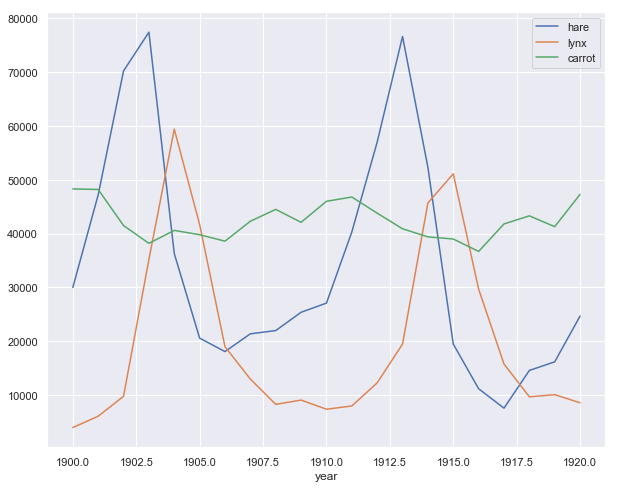

In [67]:
p = data.groupby('year').sum().plot(figsize=(10, 8), rot=0, sharey=True, legend=True)

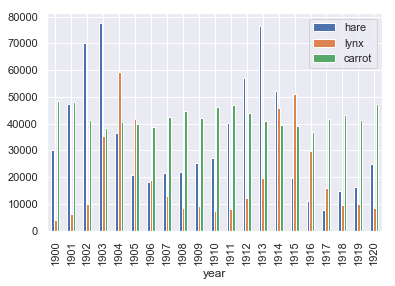

In [68]:
data.plot.bar(x='year')

## seaborn
https://seaborn.pydata.org/

In [69]:
import seaborn as sns

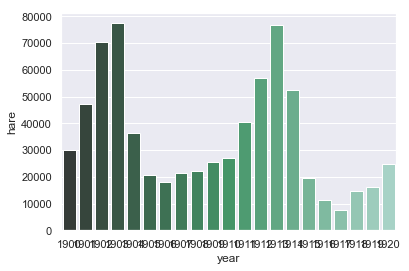

In [70]:
sns.barplot(x='year', y='hare', data=data, palette="BuGn_d")

## plotly

In [72]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as go

In [73]:
hares = [
    go.Bar(
        x=data['year'],
        y=data['hare']
    )
]

iplot(hares, filename='basic-bar')

## bokeh

In [74]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [77]:
data = pd.read_csv('populations.txt', sep='\t')

year = list(map(str, data['year'].values))
source = ColumnDataSource(data=dict(year=year, hare=list(data['hare'].values)))

p = figure(x_range=year, plot_height=350, toolbar_location=None, title="Hare")
p.vbar(x='year', top='hare', width=0.9, source=source, legend="hare",
       line_color='white')


show(p, notebook_handle=True)

In [79]:
from IPython.display import SVG, HTML

import pygal  # no commits since 2016
from IPython.display import display

bar_chart = pygal.Bar()
bar_chart.add('Hare', data['hare'].values)
bar_chart.x_labels = map(str, data['year'].values)
display({'image/svg+xml': bar_chart.render()}, raw=True)

## Виды графиков

## Scatterplot

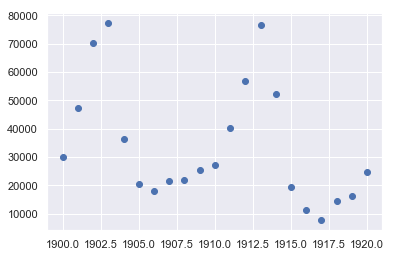

In [80]:
fig, ax1= plt.subplots(1, 1)
ax1.plot(data['year'], data['hare'], 'o')

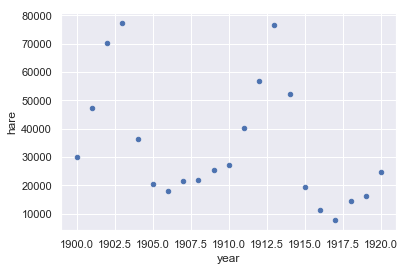

In [81]:
data.plot.scatter(x='year', y='hare')

## Bar Charts (столбчатые диаграммы)

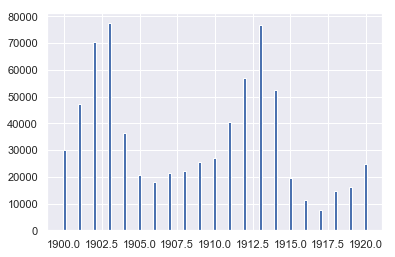

In [82]:
fig, ax1= plt.subplots(1, 1)
width=0.2
ax1.bar(data['year'], data['hare'], width);  # параметр width изменяет ширину полосы

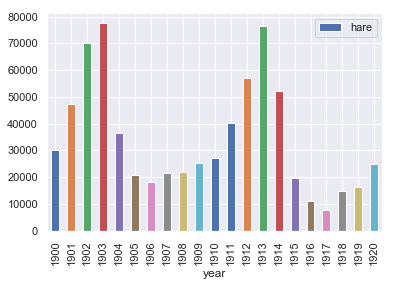

In [83]:
data.plot.bar(x='year', y='hare')

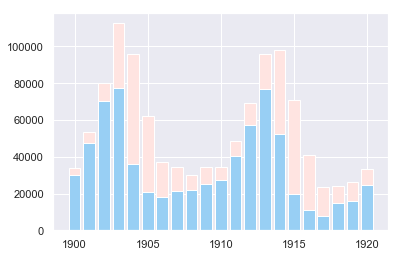

In [84]:
fig, ax1= plt.subplots(1, 1)
width=0.8
ax1.bar(data['year'], data['hare'], width, color='#98cff4'); 
ax1.bar(data['year'], data['lynx'], width, color='#ffe4e1', bottom=data['hare']);  # Если указать bottom, полосы будут отрисованы над указанными

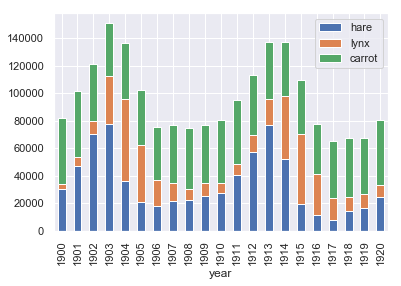

In [85]:
data.plot.bar(x='year', y=['hare', 'lynx', 'carrot'], stacked=True)

## Area plots (диаграммы областей)

Text(0,0.5,'Area between \n y=0 and hares')

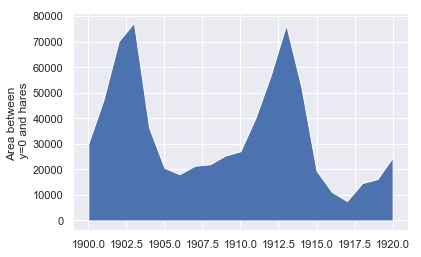

In [86]:
fig, ax1= plt.subplots(1, 1)

ax1.fill_between(data['year'], 0, data['hare'])
ax1.set_ylabel('Area between \n y=0 and hares')

## Stacked Area plots (составные диаграммы областей)

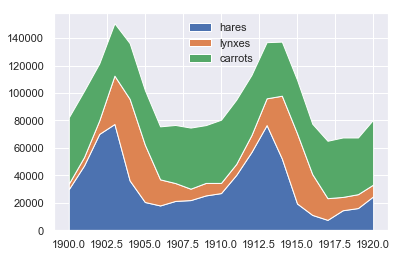

In [87]:
fig, ax1= plt.subplots(1, 1)

ax1.stackplot(data['year'], data['hare'], data['lynx'], data['carrot'])
ax1.legend(['hares','lynxes','carrots'], frameon=False,loc='upper center');


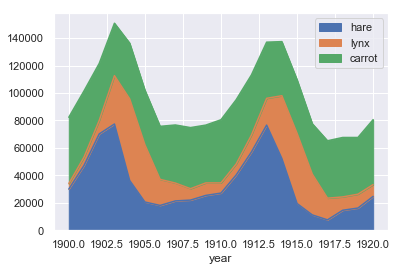

In [88]:
data.plot.area(x='year')

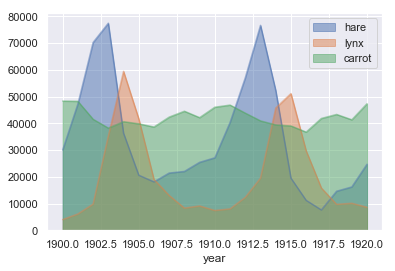

In [89]:
data.plot.area(x='year', stacked=False)

## Grouped bar charts (сгруппированные столбчатые диаграммы)

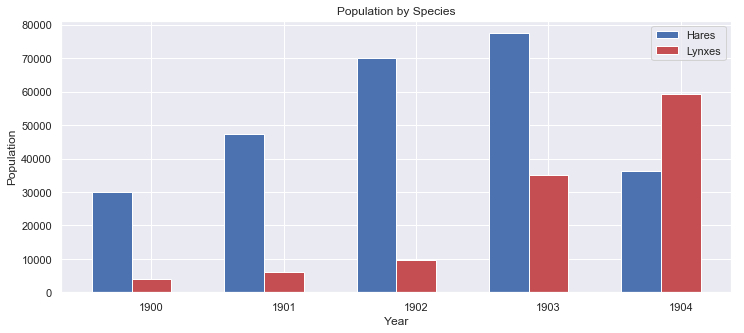

In [90]:
hares5=data['hare'][0:5]
lynxes5=data['lynx'][0:5]
new_t5=data['year'][0:5]

fig, ax1= plt.subplots(1, 1, figsize=(12,5))
bar_width=0.3
hares_bar = ax1.bar(new_t5, hares5, bar_width,
                 color='b',
                 label='Hares')

lynxes_bar = ax1.bar(new_t5 + bar_width, lynxes5, bar_width,
                 color='r',
                 label='Lynxes')

ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
plt.title('Population by Species')
plt.xticks(new_t5 + bar_width, ('1900', '1901', '1902', '1903', '1904'))
plt.legend();

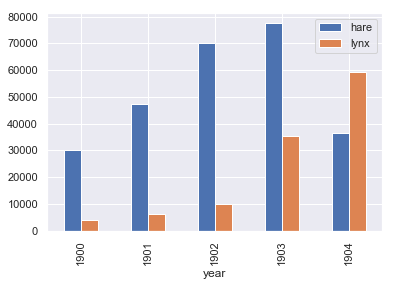

In [91]:
data[data['year'] < 1905][['hare', 'lynx', 'year']].plot.bar(x='year', y=['hare', 'lynx'])

## Круговые диаграммы

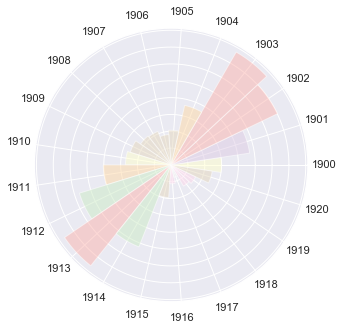

In [92]:
fig = plt.figure()
ax = plt.axes([0.025,0.025,0.95,0.95], polar=True) # This is a different way to initialize the axes of a figure

N = len(data['year'])
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N) #we need to map our time data to the angles in a circle
radii = data['hare'] 
mywidth = 0.3
bars = plt.bar(theta, radii, width=mywidth, bottom=0.0)

rmax=np.max(radii)

for r,bar in zip(radii, bars): 
    bar.set_facecolor( plt.cm.Pastel1_r(r/rmax)) #We are using here the colormap, which takes as input a number between 0 and 1
    bar.set_alpha(0.5) # With this we set the transparency of the plot. Try to put it equal to 1
    
ax.set_xticks(np.pi/180*np.linspace(0,  360, N+1))
ax.set_xticklabels((data['year'].astype(int)))
ax.set_yticklabels([])
plt.show()


## Distribution Plots (диаграммы распределения)

In [93]:
mu = 100.0
sigma1 = 15.0
A1 = np.random.normal(mu, sigma1, 10000) # Let's generate fake data, like IQ measurements
A2 = np.random.normal(150, sigma1, 5000)


In [94]:
A3 = np.hstack([A1, A2])

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



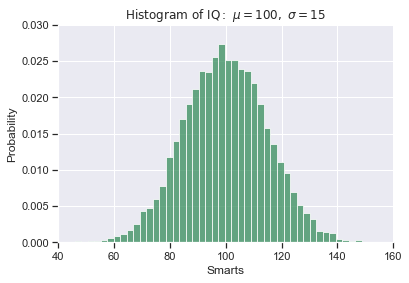

In [95]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, normed=1, facecolor='#368d5c', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



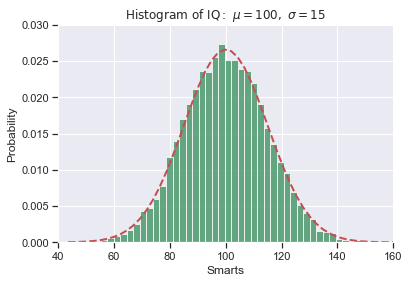

In [96]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, normed=1, facecolor='#368d5c', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma1)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



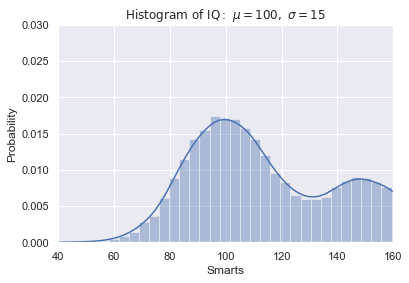

In [97]:
import seaborn as sns
p = sns.distplot(A3)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


## Density plot (диаграмма плотности распределения)

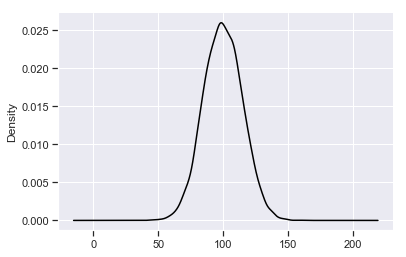

In [98]:
df = pd.DataFrame(A1)
ax = df.plot(kind='density', color = 'black')
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend().set_visible(False)


## Comparing distributions (сравнение распределений)

In [99]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.random.normal(mu, sigma2, 10000) # IQ measurements of aliens

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



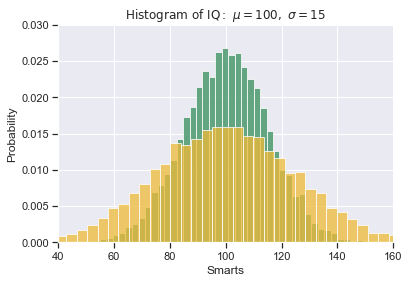

In [100]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, normed=1, facecolor='#368d5c', alpha=0.75)
n, bins, patches = plt.hist(A2, 50, normed=1, facecolor='#efbb38', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Boxplots (ящик с усами)

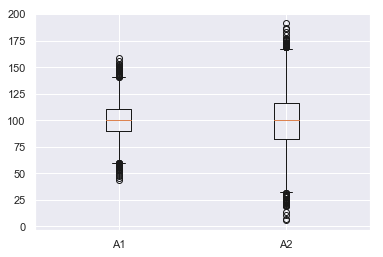

In [101]:
fig, ax= plt.subplots(1, 1)
ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2']);

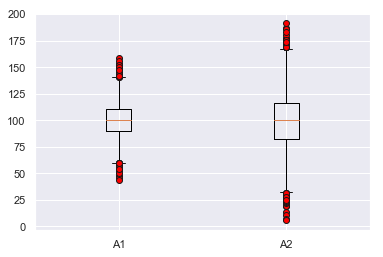

In [102]:
fig, ax= plt.subplots(1, 1)
bp=ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2'])
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], marker='o', MarkerFaceColor='red');

In [103]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.concatenate((np.random.normal(mu-50, sigma1, 10000), np.random.normal(mu+50, sigma2, 10000)), axis=0) # IQ measurements of aliens

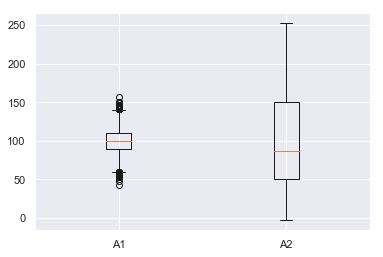

In [104]:
fig, ax= plt.subplots(1, 1)
ax.boxplot([A1, A2])
plt.setp(ax, xticklabels=['A1', 'A2']);

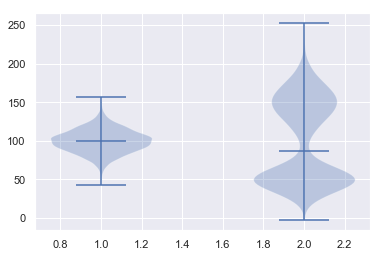

In [105]:
fig, ax= plt.subplots(1, 1)
ax.violinplot([A1, A2], showmeans=False, showmedians=True);

In [106]:
df=pd.read_csv('crimeRatesByState2005.tsv',header=0,sep='\t')

In [107]:
df.head()

state  murder  Forcible_rate  Robbery  aggravated_assult  burglary  \
0     Alabama      8.2           34.3    141.4              247.8     953.8   
1      Alaska      4.8           81.1     80.9              465.1     622.5   
2     Arizona      7.5           33.8    144.4              327.4     948.4   
3     Arkansas     6.7           42.9     91.1              386.8    1084.6   
4  California      6.9           26.0    176.1              317.3     693.3   

   larceny_theft  motor_vehicle_theft  population  
0         2650.0                288.3     4627851  
1         2599.1                391.0      686293  
2         2965.2                924.4     6500180  
3         2711.2                262.1     2855390  
4         1916.5                712.8    36756666

In [108]:
state_data=df.as_matrix(columns=df.columns[1:])
state_names=np.array(df['state'])

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



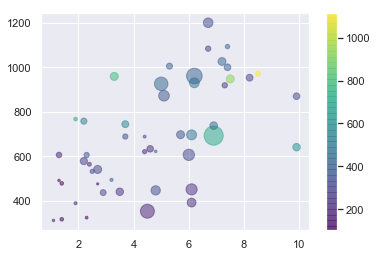

In [109]:
fig, ax = plt.subplots(1, 1)
sc = plt.scatter(df['murder'], df['burglary'], s=df['population'] / 100000, c=df['motor_vehicle_theft'], alpha=0.5, cmap=plt.cm.get_cmap('viridis') )
plt.colorbar(sc)

# This figure is not final: you should put labels, title, units, remove the top and right axes if needed, add a grid, and so on.
# But you know how to do that!

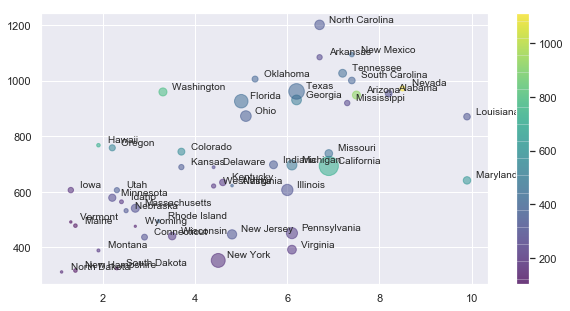

In [110]:
fig, ax= plt.subplots(1, 1, figsize=(10,5))
plt.scatter(df['murder'], df['burglary'], s=df['population']/100000, c=df['motor_vehicle_theft'], alpha=0.5, cmap=plt.cm.get_cmap('viridis'))

for i in range(len(state_names)):
    ax.annotate(state_names[i], (state_data[i,0] + 0.2, state_data[i,4] + 10))
plt.colorbar(); 

# The result is a bit cluttered, but it is hard to untangle the text in an 
# automatic way. We can solve by using intereactive visualization

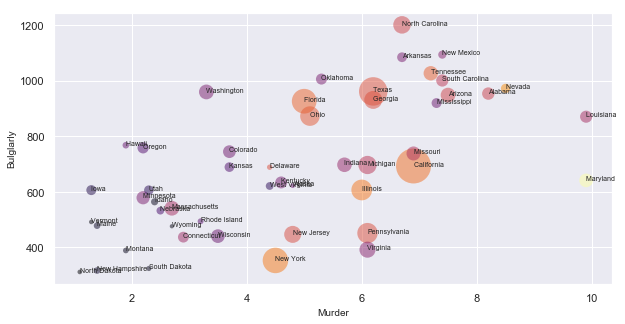

In [111]:
fig, ax = plt.subplots(1,1, figsize = (10,5))

state_names=np.array(df['state'])
x = np.array(df['murder'])
y = np.array(df['burglary'])
area = np.array(df['population']) / 30000
colours = np.array(df['Robbery'])
text = np.array(df['state'])
 
ax.scatter(x, y, s = area, c = colours, cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(text):
    ax.annotate(state, (x[i],y[i]), fontsize = 7) 

In [112]:
trace0 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=area,
        sizemode='area',
        sizemin=4,
        color=colours
    ),
    text=text
)

data = [trace0]
iplot(data, filename='bubblechart-size-ref')

In [113]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p = figure()
p.scatter(x, y, radius=area / 1000., fill_color='black',  fill_alpha=0.8, line_color=None)

show(p)

Loading BokehJS ...

## Качество визуализации для презентации

* хорошая визуализация  
NYT  
http://www.nytimes.com/interactive/2009/03/01/business/20090301_WageGap.html  
Блог plot.ly  
https://plotlyblog.tumblr.com/  
* плохая визуализация  
http://viz.wtf/  

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



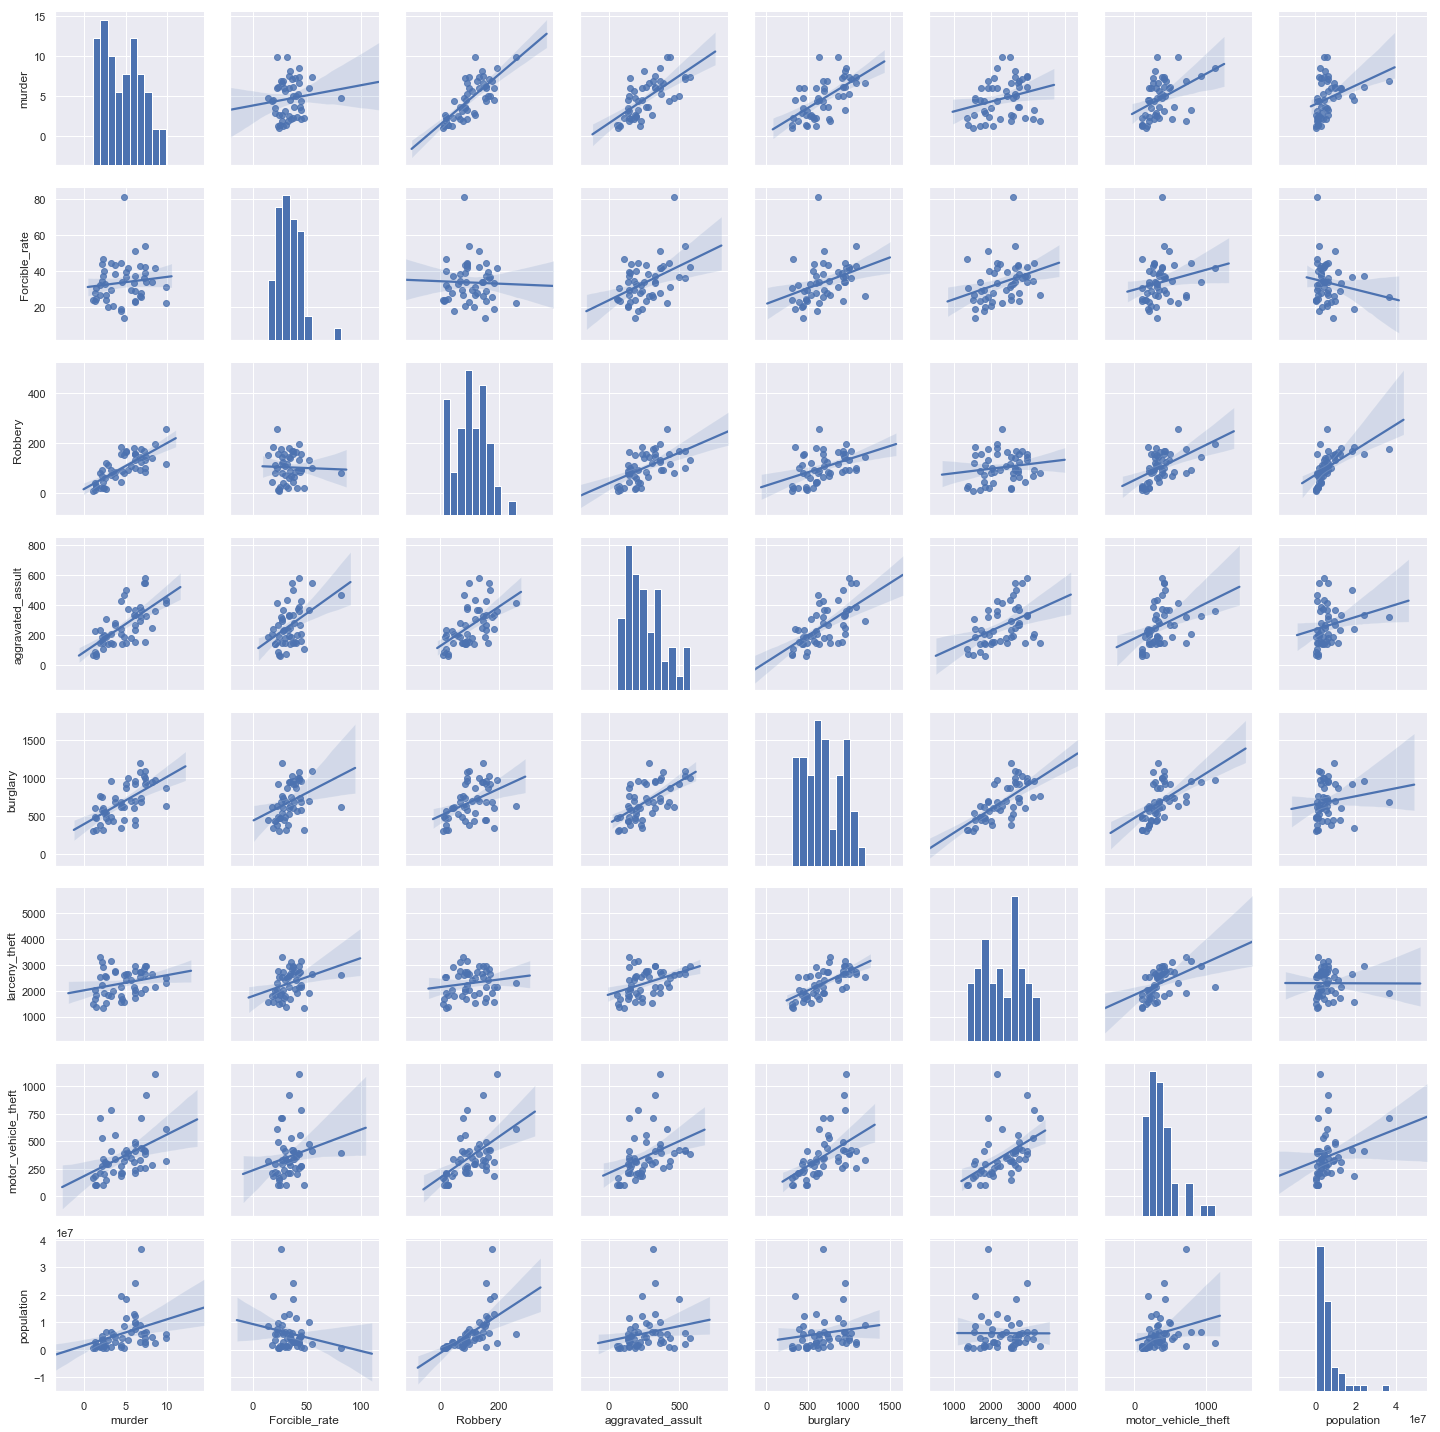

In [114]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [115]:
df.corr()

murder  Forcible_rate   Robbery  aggravated_assult  \
murder               1.000000       0.122539  0.755475           0.666560   
Forcible_rate        0.122539       1.000000 -0.034069           0.445004   
Robbery              0.755475      -0.034069  1.000000           0.565577   
aggravated_assult    0.666560       0.445004  0.565577           1.000000   
burglary             0.623176       0.355869  0.430824           0.622240   
larceny_theft        0.268918       0.325941  0.161713           0.437775   
motor_vehicle_theft  0.429665       0.203256  0.510915           0.370480   
population           0.334635      -0.165830  0.591129           0.211076   

                     burglary  larceny_theft  motor_vehicle_theft  population  
murder               0.623176       0.268918             0.429665    0.334635  
Forcible_rate        0.355869       0.325941             0.203256   -0.165830  
Robbery              0.430824       0.161713             0.510915    0.591129  
aggravated_assult    0.622240       0.437775             0.370480    0.211076  
burglary             1.000000       0.686875             0.521853    0.150310  
larceny_theft        0.686875       1.000000             0.505688   -0.003594  
motor_vehicle_theft  0.521853       0.505688             1.000000    0.236577  
population           0.150310      -0.003594             0.236577    1.000000

## Heatmap (тепловая карта)

In [121]:
nba = pd.read_csv('nba.csv', index_col=0)
# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

In [122]:
nba_norm.head()

G       MIN       PTS       FGM       FGA       FGP  \
Name                                                                         
Dwyane Wade     0.143158  0.233535  0.718308  0.595714  0.561296  0.106030   
LeBron James    0.178246  0.142626  0.579846  0.399286  0.366852  0.095980   
Kobe Bryant     0.195789 -0.008889  0.456769  0.417143  0.459444 -0.014573   
Dirk Nowitzki   0.178246  0.142626  0.387538  0.381429  0.376111  0.045729   
Danny Granger  -0.067368 -0.008889  0.379846  0.185000  0.292778 -0.115075   

                     FTM       FTA       FTP       3PM       3PA    3PP  \
Name                                                                      
Dwyane Wade     0.431875  0.498987 -0.143017 -0.032143  0.039429 -0.023   
LeBron James    0.400625  0.448354 -0.101117  0.146429  0.210857  0.004   
Kobe Bryant     0.181875  0.131899  0.111173  0.075000  0.125143  0.011   
Dirk Nowitzki   0.197500  0.106582  0.206145 -0.139286 -0.160571  0.019   
Danny Granger   0.197500  0.131899  0.172626  0.539286  0.496571  0.064   

                     ORB       DRB       TRB       AST       STL       BLK  \
Name                                                                         
Dwyane Wade    -0.066154 -0.079740 -0.075789  0.379375  0.447500  0.250714   
LeBron James   -0.014872  0.231948  0.152281  0.348125  0.239167  0.179286   
Kobe Bryant    -0.066154 -0.053766 -0.058246  0.108542  0.155833 -0.035000   
Dirk Nowitzki  -0.066154  0.361818  0.222456 -0.151875 -0.135833  0.072143   
Danny Granger  -0.168718 -0.014805 -0.067018 -0.120625 -0.052500  0.286429   

                      TO        PF  
Name                                
Dwyane Wade     0.408333 -0.068333  
LeBron James    0.241667 -0.318333  
Kobe Bryant     0.075000 -0.068333  
Dirk Nowitzki  -0.216667 -0.110000  
Danny Granger   0.033333  0.265000

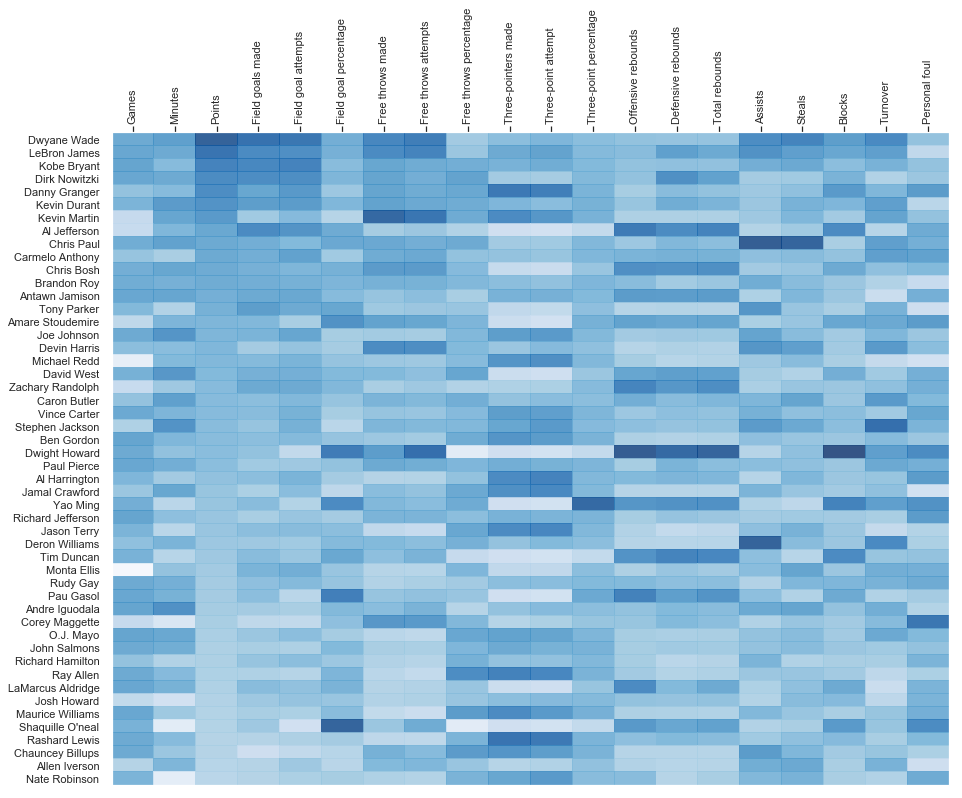

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.pcolor(nba_norm, cmap=plt.cm.get_cmap('Blues'), alpha=0.8)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(nba_norm.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(nba_norm.shape[1]) + 0.5, minor=False)

# # want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels
# label source:https://en.wikipedia.org/wiki/Basketball_statistics
labels = ['Games','Minutes','Points','Field goals made','Field goal attempts','Field goal percentage','Free throws made','Free throws attempts','Free throws percentage','Three-pointers made','Three-point attempt','Three-point percentage','Offensive rebounds','Defensive rebounds','Total rebounds','Assists','Steals','Blocks','Turnover','Personal foul'];

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False) 
ax.set_yticklabels(nba_norm.index, minor=False)

# rotate the 
t = plt.xticks(rotation=90)

In [124]:
trace = go.Heatmap(
    z=nba_norm.as_matrix(), 
    x=labels, 
    y=nba_norm.index, 
    colorscale='Blues', 
    opacity=0.8,
)
data=[trace]
iplot(data, filename='basic-heatmap')


/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



# Работа с геоданными

Вопрос: мы знаем координаты аэропортов. Как визуализировать эту информацию?

# Basemap
https://matplotlib.org/basemap/

2.0.0


/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


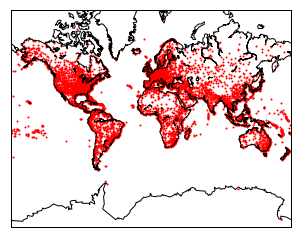

In [4]:
import matplotlib

print(matplotlib.__version__)
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None, dtype=str)

airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", 'dat1', 'dat2']

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


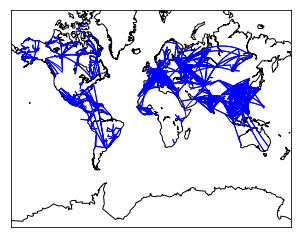

In [5]:
# Make a base map with a mercator projection.  Draw the coastlines.
routes = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat', header=None, dtype=str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()

# Iterate through the first 3000 rows.
for name, row in routes[:3000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Don't draw overly long routes.
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 90:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
    
# Show the map.
plt.show()

### Вопрос:
Мы знаем цены домов по их координатам, как визуализировать эту информацию?

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


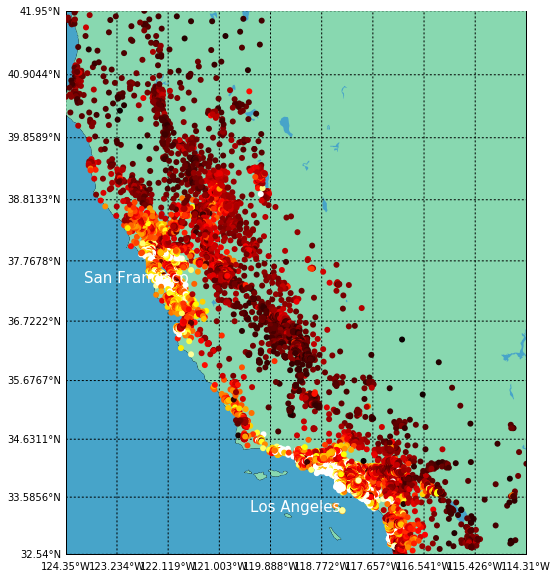

In [6]:
import sklearn.datasets.california_housing as ch
dataset = ch.fetch_california_housing()

X = dataset.data
Y = dataset.target

plt.figure(figsize=(10, 10))

lllon, lllat, urlon, urlat = X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max()

m = Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [plt.cm.hot(int((y - Y.min()) / (Y.max() - Y.min()) * 256)) for y in Y]
m.scatter(X[:, -1], X[:, -2], latlon=True, zorder=3, lw=0, c=colors)

plt.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
plt.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

plt.show()

# Folium
https://github.com/python-visualization/folium

In [7]:
import folium


m = folium.Map(location=[45.5236, -122.6750])
m

In [8]:
import folium

# Get a basic world map.
airports_map = folium.Map(location=[30, 0], zoom_start=2)
# # Draw markers on the map.
for idx, (name, row) in enumerate(airports.iterrows()):
    folium.Marker([float(row["latitude"]), float(row["longitude"])], popup=row["name"]).add_to(airports_map)
    if idx > 100:
        break
        
# Create and show the map.
airports_map

## geoplotlib
https://github.com/andrea-cuttone/geoplotlib

In [10]:
import geoplotlib
from geoplotlib.utils import read_csv


data = read_csv('flights.csv')
geoplotlib.graph(data,
                 src_lat='lat_departure',
                 src_lon='lon_departure',
                 dest_lat='lat_arrival',
                 dest_lon='lon_arrival',
                 color='hot_r',
                 alpha=16,
                 linewidth=2)
geoplotlib.show()

## networkx + plotly

https://networkx.github.io/
https://plot.ly/python/network-graphs/

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

import networkx as nx

G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

# Опрос в конце занятия 
https://docs.google.com/forms/d/e/1FAIpQLScK_yTmTrqMX3bhq_c669e9lkc7eWuz2sDcclGST7HpSpZUzw/viewform?usp=sf_link

# Домашнее задание

https://docs.google.com/document/d/1DcyGITpYr-zYq2U8CtZcQqs82xbyuIXY9Ui_22tfMjk/edit?usp=sharing

# Всегда ли визуализация данных это хорошо?
https://www.coursera.org/lecture/dataviz-design/visual-lies-and-cognitive-bias-UVVVk

Мозг человека подвержен **когнитивным искажениям**, что не позволяет нам полностью доверять нашему зрению.

Доп. материалы: http://lesswrong.com

<img src="cognitive_bias1.png">

Примеры когнитивных искажений:
* Эффект Даннинга-Крюгера https://en.wikipedia.org/wiki/Dunning–Kruger_effect
* Confirmation bias
* Causation vs correlation
* ...


https://en.wikipedia.org/wiki/List_of_cognitive_biases

# Вопросы на дом

1. Придумать пример, когда без визуализации нельзя обойтись.
2. Придумать пример, когда визуализация вредна.
3. Попробовать D3.js (https://habr.com/post/302968/)

4*. Попробовать сделать визуализацию тематической модели (напишите мне). Для тех, кто знает, что такое тематическое моделирование и хочет попрактиковаться.

# Дополнительные материалы

Блог Александра Дьяконова https://alexanderdyakonov.wordpress.com/tag/визуализация/
https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf

Сборник визуализаций http://www.visualisingdata.com

Лаборатория данных (примеры, курсы, вакансии) http://datalaboratory.ru
